In [108]:
import pandas as pd
from plotnine import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format


In [109]:
doc_df = pd.read_csv('../data/DOC_Covid19_testing_and_cases/PA_DOC_testing_data.csv', 
                     parse_dates=True,
                     index_col='date')

In [110]:
doc_df

,SCI,staff_positive,staff_negative,staff_pending,staff_death,staff_recovered,inmate_positive,inmate_negative,inmate_pending,inmate_death,...,test_transfer_positive_D,test_release_D,test_release_positive_D,test_hospital_D,test_hospital_positive_D,test_surveilance_D,test_surveilance_positive_D,test_symptomatic_D,test_symptomatic_positive_D,test_miscellaneous_D
date,,,,,,,,,,,,,,,,,,,,,
2020-04-07,Rockview,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,Albion,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,Benner Township,NaN,4.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,Cambridge Springs,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,Camp Hill,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-20,Retreat,4.0,10.0,1.0,NaN,4.0,13.0,1048.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2020-11-20,Rockview,35.0,34.0,21.0,NaN,12.0,43.0,763.0,93.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2020-11-20,Smithfield,38.0,131.0,20.0,NaN,18.0,38.0,508.0,153.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [111]:
cases_by_week = doc_df.resample('7D')['inmate_positive_D'].sum().to_frame()

<AxesSubplot:xlabel='date'>

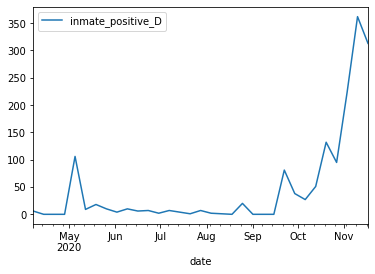

In [112]:
cases_by_week.plot()

## Create ggplot (plotnine) summary graph

In [113]:
from_week = cases_by_week.index.min().strftime('%d %b')
to_week = cases_by_week.index.max().strftime('%d %b')

In [114]:

ymax = int(round(cases_by_week.max()/100)*100)

ptitle = f'Weekly positive Covid19 cases in Pennsylvania prison\nfor weeks of {from_week} to {to_week}'



case_plot = (
    ggplot(cases_by_week) + 
    aes(x=cases_by_week.index, y='inmate_positive_D') + 
    geom_point(size=0, color='white') + 
    geom_smooth(se=False,method='loess',span=0.3, size=1.5, color='darkblue') +
    scale_x_datetime(breaks=date_breaks('1 months'), labels=date_format('%b')) + 
                    theme(panel_background = element_blank(), 
                          axis_title_y=element_text(size=10, color='darkblue'),
                          axis_text_y=element_line(color='darkblue'),
                          title=element_text(size=14),
                          axis_line_x=element_line(color='black', size=0.7),
                          axis_ticks_major_x=element_blank()
                         ) + 
                    ylim(0,ymax) +
                    ylab('Inmate Covid19 positive test result') + ggtitle(ptitle)
)

/Users/mattodonnell/files/PA-SCI_COVID19/venv/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_smooth : Removed 2 rows containing missing values.


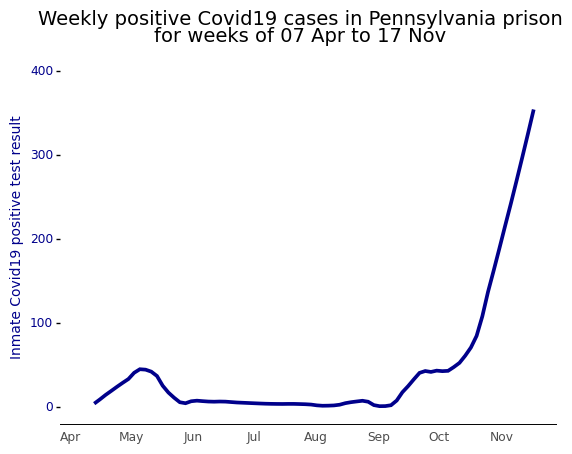

<ggplot: (315238078)>

In [115]:
case_plot

In [121]:
case_plot.save('../img/Covid19_cases_in_PA_SCI.svg')

/Users/mattodonnell/files/PA-SCI_COVID19/venv/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/mattodonnell/files/PA-SCI_COVID19/venv/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../img/Covid19_cases_in_PA_SCI.svg
/Users/mattodonnell/files/PA-SCI_COVID19/venv/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_smooth : Removed 2 rows containing missing values.
